<a href="https://colab.research.google.com/github/ernest-ricks/ernest-ricks.github.io/blob/main/Copy_of_Copy_of_Reference_Notebook_Facial_Emotion_Detection_Full_Code_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project Facial Emotion Detection**

## **Executive summary**

Facial emotion detection has powerful implications and applications for the future of data science and machine learning. The ability of a machine learning model to be able to discern facial expressions in real-time presents is significant for many industries. Whether one seeks to design a more robust chatbot or gauge public sentiment, or engagement with content or advertisement, the ability to automate the reception of feedback is vital.

In my pursuit to identify the correct model for doing so I came accross many challenges and learned many new ideas.  My key takeaways were that models such as these improve grately with more convolutional layers and larger filters. To account for overfitting, I opted to use dropout layers at each convoltioanal layer. Ultimately, I settled on a model with 80% accuracy after 50 epochs.

The solution could be improved by making more attempts to right-size the amount of convolutional layers, dropout ratios, and perhaps experimenting with data augmentation techniques. While the model is fit well, the accuracy and loss per epoch are concerning and only after several epochs do we begin to see reasonable accuracy ratings.
## ** Problem and Solution Summary**

We have a large dataset of facial images to train and test our data on. We require the use of Neural Networks to train our model on the data, so that it can "learn" the distinct features and properly apply the correct label. My proposl is to use a Convolutional Neural Network (CNN) rather than an Artificial Neural Network. I am making this reccomendation due to the feature extraction abilities of CNNs. The convolutional laters are capable of extracting more information on the features before the image is Flattened, or reduced to a series of numbers. I am recommending the model be developed in house rather than use transfer learning because most transfer learning models must be run in RGB color mode and do not feature dropout layers between convolutional layers. In other words we can have issues with over or underfitting without the modularity of interacting with the model at each layer. Also many of these models are computationally expensive and take a longer time to process an epoch. Because we need to train for potentially 100+ epochs, transfer learning models can be more time consuming.

## ** Reccomendations for Implementation **

Some recommendations for implementation would be that the trainining, validation, and test images be evenly distributed. The convolutional layers should includ pooling, batch normalization, and dropout. The ratios for dropout can be tweaked as well as the number of filters or even the number of convolutional layers themselve.

There is a challenge inheritent that you will have to do a lot of guessing and checking to refine the model. There is also a risk of over-tweaking the data loaders and creating more complex issues, so it is adviseable to make changes gradually and take note of how each change to either the data loader or convolutional layers effect results. You will notice that after each trial, I plotted the result. This is because the visual representation was a better summary than tracking each epoch. I highly advise visualizing after each trial.

I think more analysis needs to be done on the effect of data augmentation as well as the addition of more complex layers.

## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the Libraries**

In [ ]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
import keras.preprocessing.image

from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.utils import class_weight
from keras.applications.vgg16 import VGG16

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
folder_path = "Facial_emotion_images/"
picture_size = 48

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

**Observations and Insights:__** My first intution would be that a smile would best signify happiness and each of these pictures seems to convey that except perhaps the first. It is clearly happy but may have qualities that overlap with surprise. I am also concerned that some of the images will be pictures taken from an angle. It is unclear to me how the model would handle that.

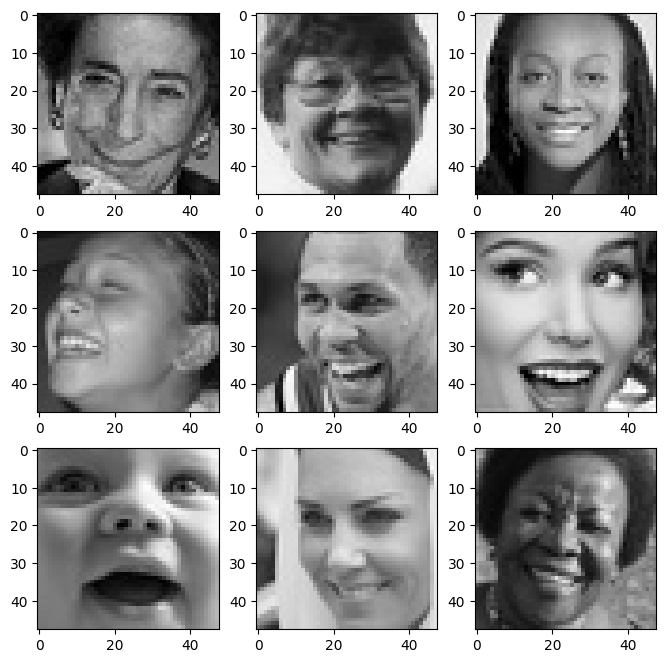

In [ ]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

### **Sad**

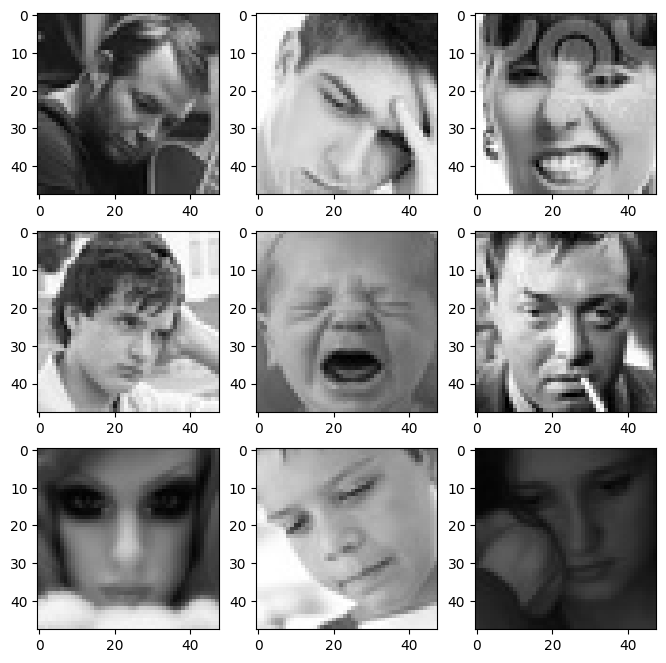

In [ ]:
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**Features most notable in curled or pursed lips and sullen but relaxed eybrows. I would be conserned of overlap with angry as anger typically evokes scrunched, furrowed eybrows.

### **Neutral**

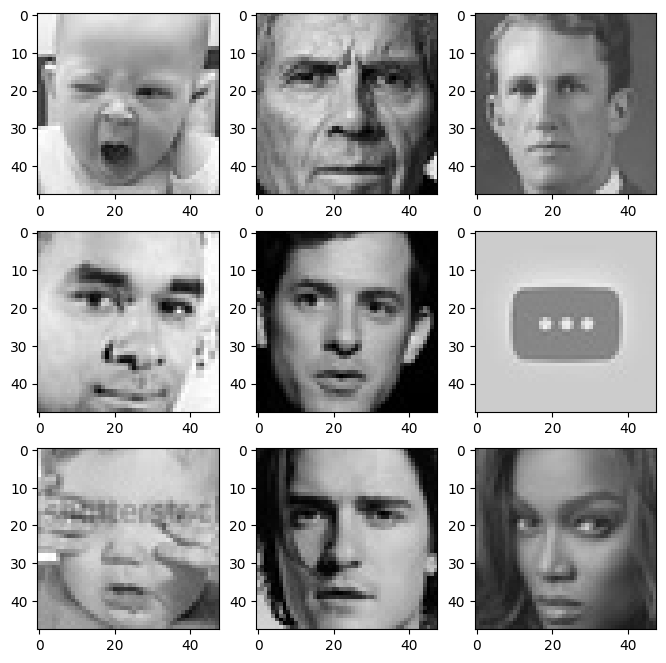

In [ ]:
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**Parallel lips and eybrows seem to be the defining feature. Some of these appear more happy, but that seems to be a question of degree of the curvature of the lips.

### **Surprised**

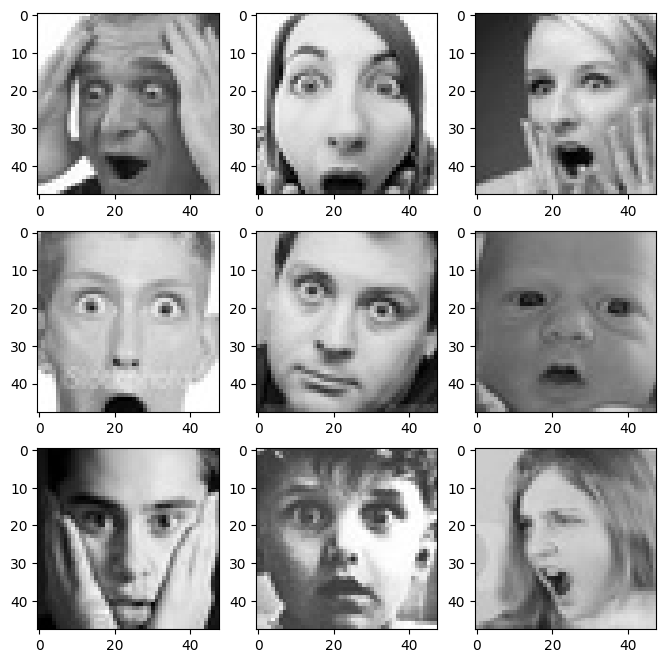

In [ ]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

Observations and Insights:__**Arched eybrows are the most definitive feature, followed by a gaping jaw but that is not always necessary. There may be error as one photo in this sample appears more neutral but has naturally arched eybrows.

## **Checking Distribution of Classes**

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'surprise':    3173


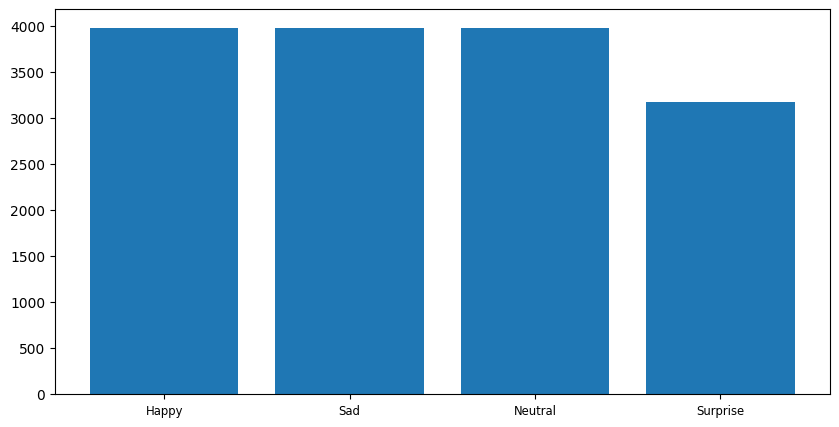

In [ ]:
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':   ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':   ", num_surprise)

plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

Because the data is imbalanced, I will apply a class weights to balance the data when it fits. This will help reduce biases in the validation data.

In [ ]:
class_counts = [num_happy, num_sad, num_neutral, num_surprise]
total_samples = sum(class_counts)

class_weights = {0: total_samples / (num_happy * 4),
                 1: total_samples / (num_sad * 4),
                 2: total_samples / (num_neutral * 4),
                 3: total_samples / (num_surprise * 4)}

print("Class Weights:", class_weights)

Class Weights: {0: 0.9500125754527163, 1: 0.9485811150175791, 2: 0.949534942182001, 3: 1.1904349196344153}


**Observations and Insights:__**

Because the data is imbalanced, I will apply a class weights to balance the data when it fits. This will help reduce biases in the validation data.

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
batch_size = 32

#Training for grayscale

train_datagen_gray = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)


train_set_gray = train_datagen_gray.flow_from_directory(
    folder_path + "train",
    target_size=(picture_size, picture_size),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
)

#Test set for grayscale

test_datagen_gray = ImageDataGenerator(
                                        rescale=1./255,
                                    )

test_set_gray = test_datagen_gray.flow_from_directory(
    folder_path + "test",
    target_size=(picture_size, picture_size),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False,
)


val_datagen_gray = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

val_set_gray = val_datagen_gray.flow_from_directory(
    folder_path + "validation",
    target_size=(picture_size, picture_size),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
)

Found 15109 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


In [ ]:
batch_size = 32

#Training for RGB

train_datagen_rgb = ImageDataGenerator(
                                    horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)




train_set_rgb = train_datagen_rgb.flow_from_directory(
    folder_path + "train",
    target_size=(picture_size, picture_size),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
)

#Test set for RGB

test_datagen_rgb = ImageDataGenerator(
                                    rescale=1./255,
                                    )

test_set_rgb = test_datagen_rgb.flow_from_directory(
    folder_path + "test",
    target_size=(picture_size, picture_size),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
)

#Validation set for RGB
val_datagen_rgb = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

val_set_rgb = val_datagen_rgb.flow_from_directory(
    folder_path + "validation",
    target_size=(picture_size, picture_size),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
)

Found 15109 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


In [ ]:


import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

In [ ]:
# For our base model we will be using convolutional and pooling layers for feature extraction.
# First we will determine if there is different behavior from our basic model based on the color_mode.
# This model pertains to color_mode = 'gray'

model1 = Sequential([

#3 Convolutional layers

        tf.keras.layers.Conv2D(64, (2, 2), padding='same', input_shape=(48, 48, 1), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(32, (2, 2), padding='same',activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(32, (2, 2), padding='same',activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),

# Flatten to move to the fully connected dense layer

        tf.keras.layers.Flatten(),
# Dense layer with 512 neurons

        tf.keras.layers.Dense(256),
#Softmax activation with 4 units to represent our 4 classes.

        tf.keras.layers.Dropout(.4),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
def gray_model():model = model1
model1.summary()

model1.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])



history = model1.fit(
    train_set_gray,
    epochs = 20,
    validation_data = val_set_gray,

    class_weight= class_weights,
    shuffle = True,
    batch_size = 32,
    verbose = 1
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                      

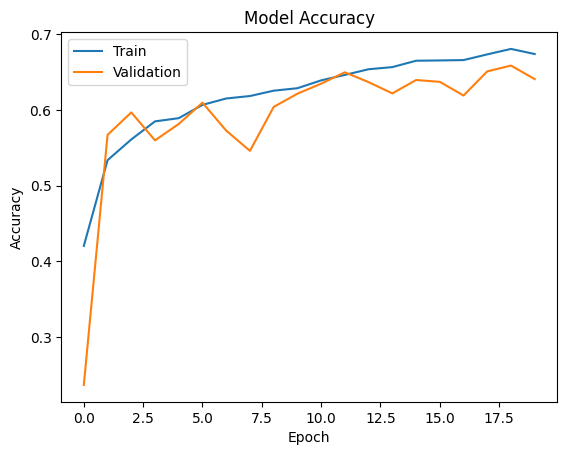

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model1.evaluate(
    test_set_gray,
    batch_size = 32,
    verbose = 1

)

4/4 [==============================] - 0s 14ms/step - loss: 0.7777 - accuracy: 0.6406


### **Creating the Base Neural Network**

In [ ]:
from keras import backend
backend.clear_session()

import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# For our base model we will be using convolutional and pooling layers for feature extractio.
model2 = Sequential([

#3 Convolutional layers

        tf.keras.layers.Conv2D(64, (2, 2), padding='same', input_shape=(48, 48, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(32, (2, 2), padding='same',activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(32, (2, 2), padding='same',activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),

# Flatten to move to the fully connected dense layer

        tf.keras.layers.Flatten(),
# Dense layer with 512 neurons

        tf.keras.layers.Dense(256),
#Softmax activation with 4 units to represent our 4 classes.

        tf.keras.layers.Dropout(.4),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
def rgb_model():model = model2
model2.summary()

model2.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])



history_2 = model2.fit(
    train_set_rgb,
    epochs = 20,
    validation_data = val_set_rgb,
    class_weight= class_weights,
    shuffle = True,
    batch_size = 32,
    verbose = 1
)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                        

### **Compiling and Training the Model**

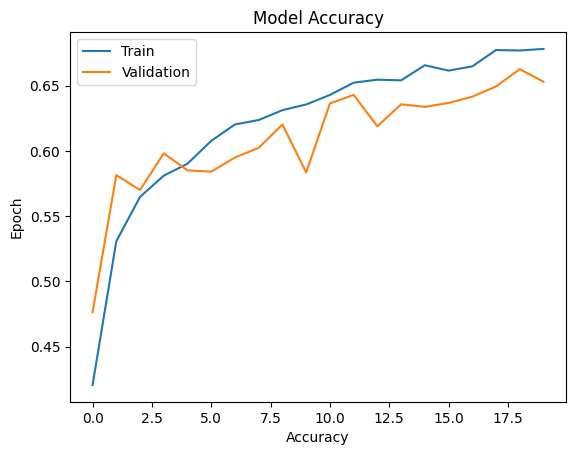

In [ ]:

plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the Model on the Test Set**

In [ ]:
accuracy = model2.evaluate(
    test_set_rgb,
    batch_size = 32,
    verbose = 1

)

4/4 [==============================] - 0s 15ms/step - loss: 0.6642 - accuracy: 0.7188


**Observations and Insights:__**After testing testing the basic model on both grayscale and rgb. I found that the model itself is overfitting and not yeilding satisfactory accuracy accross 20 epochs and that the accuracy of the validation set trends downward from the training data. The color_mode made little differenct as the evaluation yielded the same accuracy however the loss was slightly less on rgb. I will have to add complexity to the next iteration accross both color_modes to better determine the difference.

### **Creating the second Convolutional Neural Network**

In [ ]:
backend.clear_session()

import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

- Try out a slightly larger architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 256)      1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 24, 24, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0

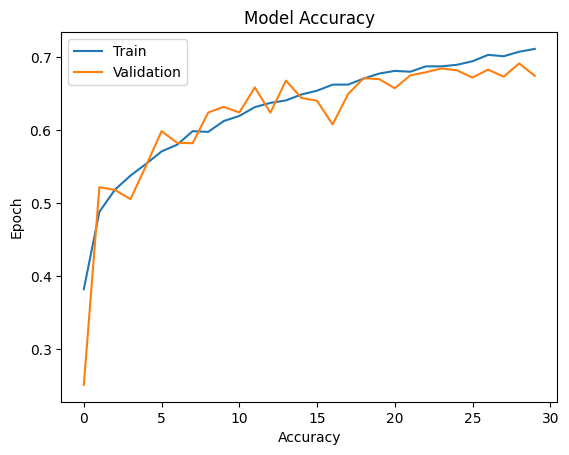

In [ ]:
# This model will utilize various techiniques to see how we can improve accuracy
# This model pertains to color_mode = 'gray'

model3 = Sequential([

#3 Convolutional layers

        tf.keras.layers.Conv2D(256, (2, 2), padding='same', input_shape=(48, 48, 1), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(.2),

        tf.keras.layers.Conv2D(128, (2, 2), padding='same',activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(.2),

        tf.keras.layers.Conv2D(128, (2, 2), padding='same',activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(.2),

# Flatten to move to the fully connected dense layer

        tf.keras.layers.Flatten(),
# Dense layer with 512 neurons

        tf.keras.layers.Dense(512),

#Softmax activation with 4 units to represent our 4 classes.
        tf.keras.layers.Dense(4, activation='softmax')
    ])
def gray_model():model = model3
model3.summary()

model3.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])


#Fit the the model to our training data
history_3 = model3.fit(
    train_set_gray,
    epochs = 30,
    validation_data = val_set_gray,
    shuffle = True,
    batch_size = 32,
    verbose = 1
)
#Visualize the cross validation
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the Model on the Test Set**

In [ ]:
accuracy = model3.evaluate(
    test_set_gray,
    batch_size = 32,
    verbose = 1

)

4/4 [==============================] - 0s 14ms/step - loss: 0.6512 - accuracy: 0.7578


**Observations and Insights: The larger model with additional epochs tend to scale the accuracy and reduce loss with each epoch. Presumably with more epochs I could reach a more acceptable accuracy rating.**

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')
vgg_model = Model(inputs=vgg.input, outputs= transfer_layer.output)
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
from tensorflow.python.ops.variables import validate_synchronization_aggregation_trainable
transfer_model1 = Sequential()

transfer_model1.add(vgg_model)

transfer_model1.add(Flatten())

transfer_model1.add(Dense(512, activation = 'relu'))
transfer_model1.add(Dropout(.4))
#transfer_model1.add(Dense(32, activation = 'relu'))
transfer_model1.add(Dense(4, activation='softmax'))

In [ ]:
transfer_model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
transfer_model1_history = transfer_model1.fit(train_set_rgb,
                                              validation_data= val_set_rgb,
                                              class_weight=class_weights,
                                              epochs=30)

Epoch 1/30
473/473 [==============================] - 30s 62ms/step - loss: 1.2398 - accuracy: 0.4232 - val_loss: 1.2264 - val_accuracy: 0.4105
Epoch 2/30
473/473 [==============================] - 29s 61ms/step - loss: 1.1777 - accuracy: 0.4597 - val_loss: 1.2219 - val_accuracy: 0.4463
Epoch 3/30
473/473 [==============================] - 28s 59ms/step - loss: 1.1594 - accuracy: 0.4726 - val_loss: 1.1792 - val_accuracy: 0.4682
Epoch 4/30
473/473 [==============================] - 28s 59ms/step - loss: 1.1469 - accuracy: 0.4786 - val_loss: 1.1495 - val_accuracy: 0.4911
Epoch 5/30
473/473 [==============================] - 28s 60ms/step - loss: 1.1386 - accuracy: 0.4772 - val_loss: 1.1432 - val_accuracy: 0.4822
Epoch 6/30
473/473 [==============================] - 28s 60ms/step - loss: 1.1252 - accuracy: 0.4896 - val_loss: 1.1599 - val_accuracy: 0.4734
Epoch 7/30
473/473 [==============================] - 28s 59ms/step - loss: 1.1243 - accuracy: 0.4944 - val_loss: 1.1816 - val_accuracy:

### **Compiling and Training the VGG16 Model**

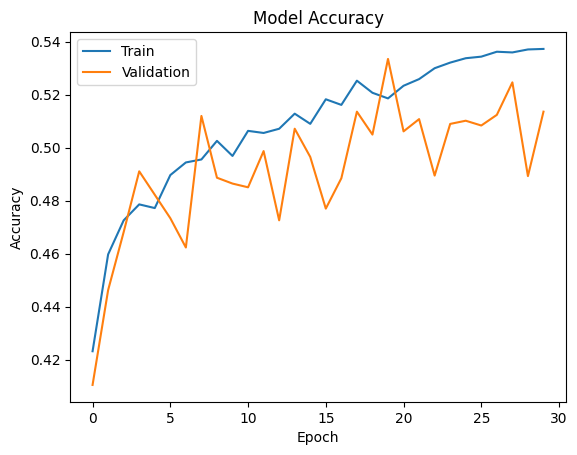

In [ ]:
plt.plot(transfer_model1_history.history['accuracy'])
plt.plot(transfer_model1_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the VGG16 model**

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__** The model seems to be underfitting. Our performance is very low per the number of epochs. Also being that is must run in RGB is computationally more expensive and time consuming than grayscale.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [ ]:

import keras.applications as ap

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

### **Compiling and Training the Model**

In [ ]:


transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable=False
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model = Sequential()
model.add(base_model)
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
pred = Dense(4, activation='softmax')(x)
resnetmodel = Model(inputs=base_model.input, outputs=pred)

In [ ]:
resnetmodel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = resnetmodel.fit(train_set_rgb,
                    epochs=20,
                    validation_data=val_set_rgb,
                    class_weight= class_weights,
                    batch_size=32,
                    verbose=1)



Epoch 1/20
473/473 [==============================] - 61s 67ms/step - loss: 0.5237 - accuracy: 0.7901 - val_loss: 0.8824 - val_accuracy: 0.6574
Epoch 2/20
473/473 [==============================] - 31s 64ms/step - loss: 0.4950 - accuracy: 0.8024 - val_loss: 0.8196 - val_accuracy: 0.7010
Epoch 3/20
473/473 [==============================] - 31s 66ms/step - loss: 0.4889 - accuracy: 0.8081 - val_loss: 0.7964 - val_accuracy: 0.7026
Epoch 4/20
473/473 [==============================] - 30s 64ms/step - loss: 0.4556 - accuracy: 0.8194 - val_loss: 0.8313 - val_accuracy: 0.6974
Epoch 5/20
473/473 [==============================] - 31s 65ms/step - loss: 0.4316 - accuracy: 0.8306 - val_loss: 0.8394 - val_accuracy: 0.6960
Epoch 6/20
473/473 [==============================] - 31s 65ms/step - loss: 0.4162 - accuracy: 0.8365 - val_loss: 0.8716 - val_accuracy: 0.6990
Epoch 7/20
473/473 [==============================] - 31s 65ms/step - loss: 0.3875 - accuracy: 0.8484 - val_loss: 0.8726 - val_accuracy:

### **Evaluating the ResNet Model**

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
backend.clear_session()

import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
# This model will utilize various techiniques to see how we can improve accuracy
# This model pertains to color_mode = 'gray'

model4 = Sequential([

#5 Convolutional layers

        tf.keras.layers.Conv2D(256, (2, 2), padding='same', input_shape=(48, 48, 1), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(.2),

        tf.keras.layers.Conv2D(128, (2, 2), padding='same',activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(.2),

        tf.keras.layers.Conv2D(128, (2, 2), padding='same',activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(.2),

        tf.keras.layers.Conv2D(128, (2, 2), padding='same',activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(.2),

        tf.keras.layers.Conv2D(128, (2, 2), padding='same',activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(.2),

# Flatten to move to the fully connected dense layer

        tf.keras.layers.Flatten(),
# Dense layer with 512 neurons

        tf.keras.layers.Dense(512),

#Softmax activation with 4 units to represent our 4 classes.
        tf.keras.layers.Dense(4, activation='softmax')
    ])
def gray_model_2():model = model4


model4.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])


history_4 = model4.fit(
    train_set_gray,
    epochs = 50,
    validation_data = val_set_gray,
    class_weight= class_weights,
    shuffle = True,
    batch_size = 32,
    verbose = 1
)


Epoch 1/50
473/473 [==============================] - 24s 42ms/step - loss: 1.4741 - accuracy: 0.2875 - val_loss: 1.3251 - val_accuracy: 0.3450
Epoch 2/50
473/473 [==============================] - 19s 41ms/step - loss: 1.2388 - accuracy: 0.4232 - val_loss: 1.1833 - val_accuracy: 0.4684
Epoch 3/50
473/473 [==============================] - 19s 41ms/step - loss: 1.0713 - accuracy: 0.5231 - val_loss: 0.9723 - val_accuracy: 0.5712
Epoch 4/50
473/473 [==============================] - 20s 42ms/step - loss: 0.9943 - accuracy: 0.5589 - val_loss: 0.9273 - val_accuracy: 0.5925
Epoch 5/50
473/473 [==============================] - 19s 41ms/step - loss: 0.9475 - accuracy: 0.5806 - val_loss: 0.9256 - val_accuracy: 0.6174
Epoch 6/50
473/473 [==============================] - 20s 42ms/step - loss: 0.9095 - accuracy: 0.6009 - val_loss: 0.8443 - val_accuracy: 0.6526
Epoch 7/50
473/473 [==============================] - 19s 40ms/step - loss: 0.8828 - accuracy: 0.6182 - val_loss: 0.8050 - val_accuracy:

### **Compiling and Training the Model**

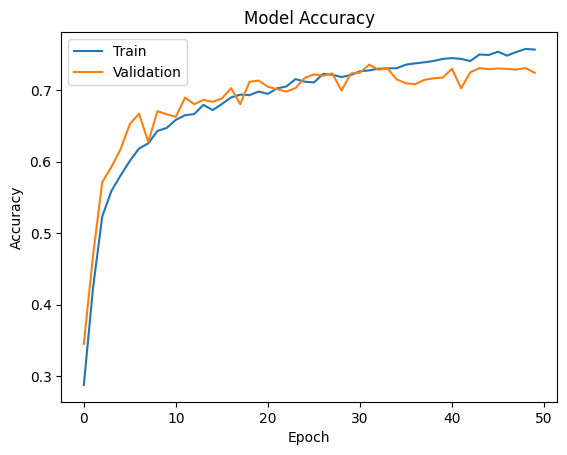

In [ ]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the Model on Test Set**

In [ ]:
accuracy = model4.evaluate(
    test_set_gray,
    batch_size = 32,
    verbose = 1

)

4/4 [==============================] - 0s 14ms/step - loss: 0.5074 - accuracy: 0.8047


**Observations and Insights:__**

### **Plotting the Confusion Matrix for the chosen final model**

Found 128 images belonging to 4 classes.
1/1 [==============================] - 0s 19ms/step


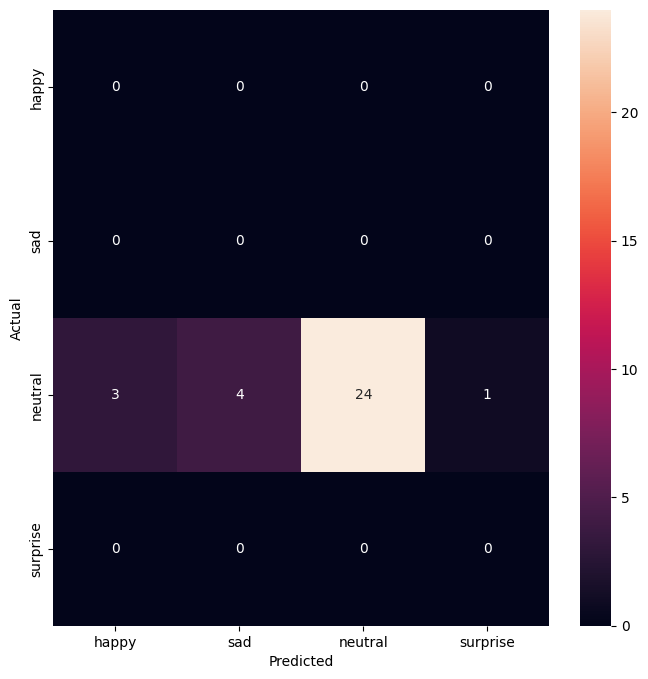

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_datagen_gray.flow_from_directory(folder_path + "test",
                                                              target_size = (picture_size,picture_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True)
test_images, test_labels = next(test_set_gray)

# Write the name of your chosen model in the blank
pred = model4.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 8))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Conclusion:____________**

### **Insights**

### **Refined insights**:

While the transfer learning models are convenient, the fact that they require rgb color_mode and have far more parameters make them more computationally expensive per epoch. Comparitively resnet was closer in accuracy to my original model than vgg16, however the main factor in improving accuracy seems to be the # of epochs.

### **Comparison of various techniques and their relative performance**:
- Adding dropout layers at each convolutional layer was more effective at solving my issues with overfitting than placing a dropout layer at the end. Also adding the additional convolutional layers helped to increase accuracy.
### **Proposal for the final solution design**:

I would propose to adopt model_4 as, with time permitting, we can achieve hire accuracy while staying in grayscale to quickly and efficiently produce an accurate model.